In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [9]:
def import_bls_excel(directory, file_name):
    df = pd.read_excel(directory+file_name,
                  dtype = {'Year': 'Int16'},
                      skiprows=12)
    column = file_name.replace('.xlsx', '')
    df_new = pd.DataFrame(columns=['Year', 'Month', column])
    colnames = list(df.columns)
    colnames.remove('Year')
    for index in df.index:
        row = df.loc[index]
        for col in colnames:
            df_new.loc[len(df_new.index)] = [row['Year'],col,row[col]]
    return df_new.set_index(['Year', 'Month'])

In [10]:
def get_bls_data_merged(path, df_merge):
    for name in os.listdir(path):
        new_df = import_bls_excel(directory=path, file_name=name)
        df_merge = pd.merge(df_merge, new_df, left_index=True, right_index=True, how='left')
    return df_merge

In [11]:
def get_bls_dummy(date_range):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    dummy_data = []
    for i in range(date_range[0], date_range[1]):
        for m in months:
            dummy_data.append([i,m])
    df_dummy = pd.DataFrame(data=dummy_data, columns=['Year', 'Month'])
    df_dummy.set_index(['Year', 'Month'], inplace=True)
    return df_dummy

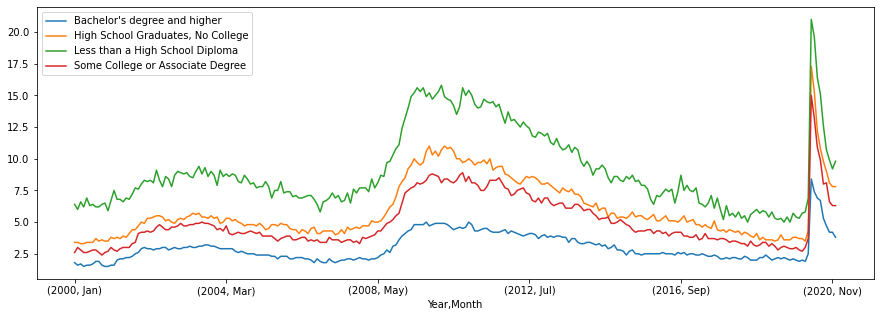

In [12]:
ans = get_bls_data_merged(path='./Data/BLS/Education/', df_merge=get_bls_dummy([2000, 2021]))
ans.plot(figsize=(15, 5));

### Part 2: Unemployed vs Underemployed

In [13]:
df_unemployed = pd.read_excel('./Data/unemployed_vs_underemployed/labor-market-for-recent-college-grads.xlsx', sheet_name='ch1_unemployment', 
                   usecols=['Date', 'Recent graduates', 'College graduates'], skiprows=13, skipfooter=2)
df_unemployed.set_index('Date', inplace = True)

In [14]:
df_underemployed = pd.read_excel('./Data/unemployed_vs_underemployed/labor-market-for-recent-college-grads.xlsx', sheet_name='ch2_underemployment', 
                   usecols=['Date', 'Recent graduates', 'College graduates'], skiprows=13, skipfooter=2)
df_underemployed.set_index('Date', inplace = True)

In [15]:
df_merged = pd.merge(df_unemployed, df_underemployed, left_index=True, right_index=True, how="inner")
df_merged.columns = ['Unemployed Recent Graduates', 'Unemployed College Graduates', 
                     'Underemployed Recent Graduates', 'Underemployed College Graduates']
df_merged.head()

,Unemployed Recent Graduates,Unemployed College Graduates,Underemployed Recent Graduates,Underemployed College Graduates
Date,,,,
1990-01-01,3.381,2.270,42.918,34.082
1990-02-01,3.039,2.206,43.244,34.085
1990-03-01,3.136,2.165,43.284,34.089
1990-04-01,3.565,2.186,44.533,34.215
1990-05-01,3.861,2.198,44.768,34.348


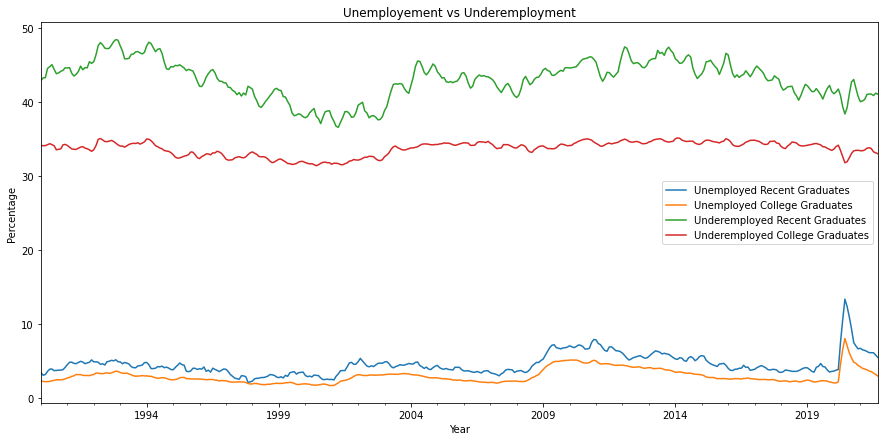

In [16]:
df_merged.plot(figsize=[15, 7], title='Unemployement vs Underemployment').set(xlabel='Year', ylabel='Percentage');

### Part 3: Unemployment Rates or States of the USA

In [17]:
csv_file_names = ['year_2020', 'year_2019', 'year_2018', 'year_2017', 'year_2016']
concated_df = pd.DataFrame()
for file in csv_file_names:
    df = pd.read_csv('./Data/Unemployment Rates for States/'+ file +'.csv', usecols=['State', 'Rate', 'Rank', 'Year'])
    concated_df = pd.concat([concated_df, df], axis=1)
concated_df.head()

,State,Rate,Rank,Year,State,Rate,Rank,Year,State,Rate,Rank,Year,State,Rate,Rank,Year,State,Rate,Rank,Year
0,Nebraska,4.2,1,2020,North Dakota,2.3,1,2019,Hawaii,2.4,1,2018,Hawaii,2.2,1,2017,Hawaii,2.9,1,2016
1,South Dakota,4.6,2,2020,Vermont,2.3,1,2019,North Dakota,2.5,2,2018,Colorado,2.6,2,2017,New Hampshire,2.9,1,2016
2,Utah,4.7,3,2020,Hawaii,2.5,3,2019,Iowa,2.6,3,2018,North Dakota,2.7,3,2017,South Dakota,3.0,3,2016
3,North Dakota,5.1,4,2020,Utah,2.5,3,2019,New Hampshire,2.6,3,2018,New Hampshire,2.8,4,2017,Colorado,3.1,4,2016
4,Iowa,5.3,5,2020,New Hampshire,2.6,5,2019,Vermont,2.6,3,2018,Nebraska,2.9,5,2017,Nebraska,3.1,4,2016


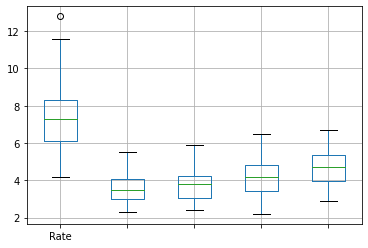

In [18]:
concated_df.boxplot(column=['Rate']);

### Part 4: Job Losses and Job Gains

In [19]:
def plot_job_loss_gain(path):
    df = pd.read_csv(path, 
                     index_col='State', 
                     usecols=['State','Mar 2019','Mar 2020','Mar 2021'])
    for col in df.columns:
        df[col] = df[col].str.replace(',', '').astype(int)
    df['% Change Q1 19-20'] = ((df['Mar 2020'] - df['Mar 2019'])/df['Mar 2019']) * 100
    df['% Change Q1 20-21'] = ((df['Mar 2021'] - df['Mar 2020'])/df['Mar 2020']) * 100
    df.plot(y=['% Change Q1 19-20', '% Change Q1 20-21'], use_index=True, kind='bar', figsize=(20, 7))
    plt.grid()
    plt.show()

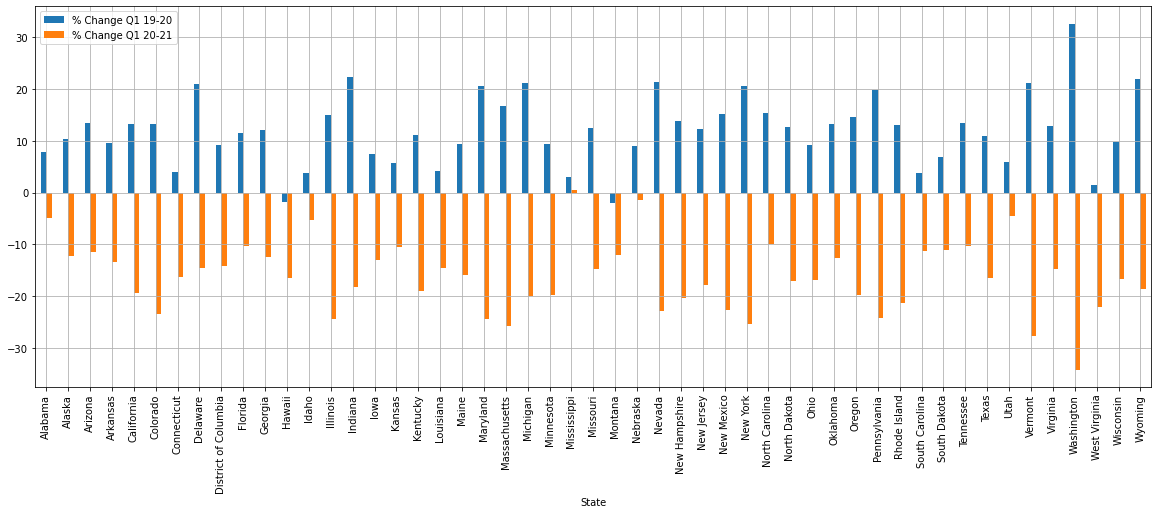

In [21]:
plot_job_loss_gain(path='./Data/BLS state job gains and losses/Gross_job_losses.csv')

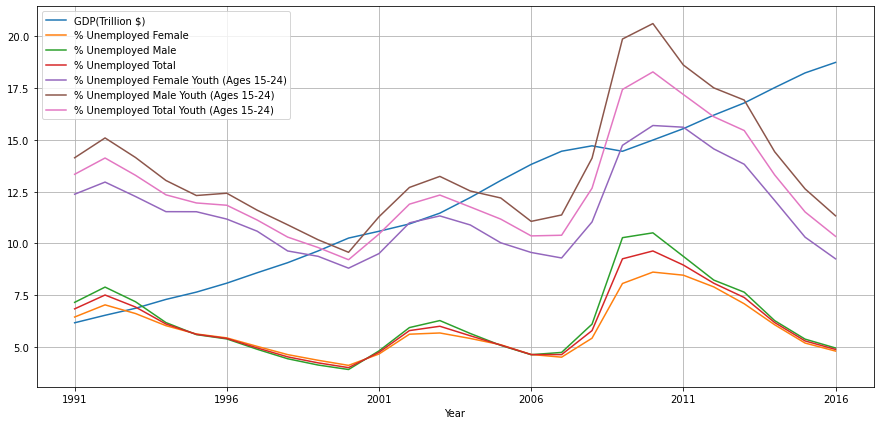

In [22]:
df_gdp = pd.read_excel('./Data/GDP and Unemployment/GDP.xls',skiprows=3, index_col='Country Name')
df_gdp = df_gdp[df_gdp.index == 'United States'].transpose().iloc[3:]
df_gdp.index.names = ['Year']
df_gdp.columns = ['GDP(Trillion $)']
df_gdp['GDP(Trillion $)'] = df_gdp['GDP(Trillion $)']/(10**12)

df_unemployment = pd.read_csv('./Data/GDP and Unemployment/Unemployment.csv')
df_unemployment = df_unemployment.transpose().iloc[2:,:6]
df_unemployment.columns = df_unemployment.iloc[0]
df_unemployment = df_unemployment.iloc[3:,]
df_unemployment.columns = ['% Unemployed Female',
                          '% Unemployed Male',
                          '% Unemployed Total',
                          '% Unemployed Female Youth (Ages 15-24)',
                          '% Unemployed Male Youth (Ages 15-24)',
                          '% Unemployed Total Youth (Ages 15-24)']
df_unemployment.index.names = ['Year']
df_unemployment.index = df_unemployment.index.str.split('[').str[0].str.strip()

df_gdp_unemployment = pd.merge(df_gdp,
                              df_unemployment,
                              left_index=True,
                              right_index=True,
                              how='inner')

df_gdp_unemployment.plot(figsize=(15, 7))
plt.grid()
plt.show()

### Part 5: President relation with unemployment rate

In [23]:
df_hor = pd.read_csv('./Data/Political Party and Unemployment/United States House of Representatives Database.csv',
                    skiprows=9,
                    skipfooter=5,
                    dtype={'House Democrats (Count) (Seats)':'Int16',
                          'House Republicans (Count) (Seats)':'Int16',
                          'House Other Parties (Count) (Seats)':'Int16'},
                    index_col='Year',
                    names=['Year', 'Democrats', 'Republicans', 'Other Parties'])

df_hor['Max Seats'] = df_hor[['Democrats','Republicans']].apply(lambda x: 'Democrats'
                                                                if x['Democrats'] > x['Republicans']
                                                                else 'Republicans', axis=1)

In [24]:
df_unemployment.index = df_unemployment.index.astype(int)
df_hor_ump = pd.merge(df_hor, df_unemployment['% Unemployed Total'],
                     left_index=True,
                     right_index=True,
                     how='inner')

In [26]:
colours = []
for party in df_hor_ump['Max Seats']:
    if party == 'Democrats':
        colours.append('Blue')
    elif party == 'Republicans':
        colours.append('Green')
    else:
        colours.append('Red')

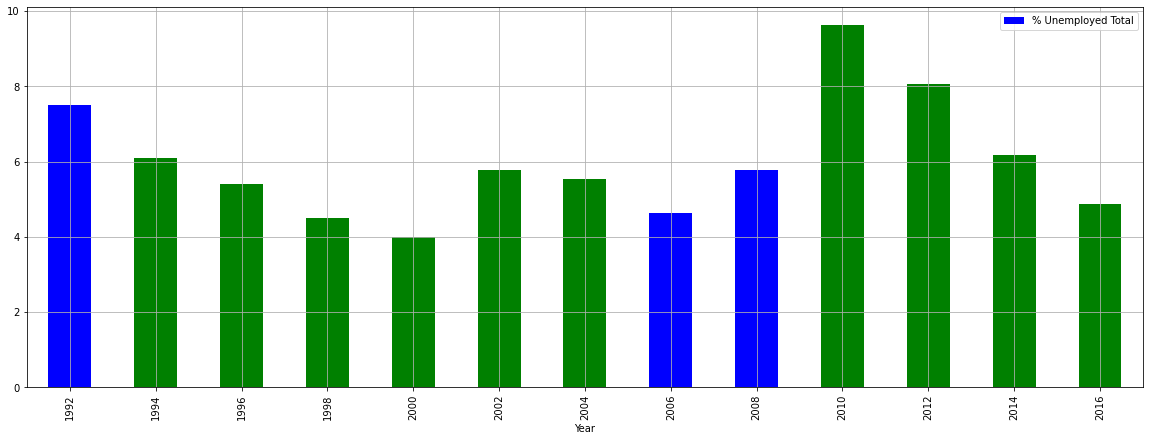

In [27]:
df_hor_ump.plot(y='% Unemployed Total', use_index=True, kind='bar', figsize=(20, 7), color=colours)
plt.grid()
plt.show()

##### New data

In [28]:
df_president = pd.read_csv('./Data/Political Party and Unemployment/1976-2020-president.csv')

In [29]:
df_max_votes = pd.pivot_table(df_president, values='candidatevotes', index=['year'], aggfunc=np.max)
df_merged = pd.merge(df_max_votes, df_president,
                    right_on='candidatevotes',
                    left_on='candidatevotes',
                    how='inner')

In [30]:
df_merged

,candidatevotes,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,totalvotes,version,notes,party_simplified
0,3882244,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,7803770,20210113,NaN,REPUBLICAN
1,4522994,1980,CALIFORNIA,CA,6,93,71,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,8582938,20210113,NaN,REPUBLICAN
2,5467009,1984,CALIFORNIA,CA,6,93,71,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,9505041,20210113,NaN,REPUBLICAN
3,5054917,1988,CALIFORNIA,CA,6,93,71,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,9887065,20210113,NaN,REPUBLICAN
4,5121325,1992,CALIFORNIA,CA,6,93,71,US PRESIDENT,"CLINTON, BILL",DEMOCRAT,False,11131721,20210113,NaN,DEMOCRAT
5,5119835,1996,CALIFORNIA,CA,6,93,71,US PRESIDENT,"CLINTON, BILL",DEMOCRAT,False,10019469,20210113,NaN,DEMOCRAT
6,5861203,2000,CALIFORNIA,CA,6,93,71,US PRESIDENT,"GORE, AL",DEMOCRAT,False,10965822,20210113,NaN,DEMOCRAT
7,6745485,2004,CALIFORNIA,CA,6,93,71,US PRESIDENT,"KERRY, JOHN",DEMOCRAT,False,12421353,20210113,NaN,DEMOCRAT
8,8274473,2008,CALIFORNIA,CA,6,93,71,US PRESIDENT,"OBAMA, BARACK H.",DEMOCRAT,False,13561900,20210113,NaN,DEMOCRAT
9,7854285,2012,CALIFORNIA,CA,6,93,71,US PRESIDENT,"OBAMA, BARACK H.",DEMOCRAT,False,13038547,20210113,NaN,DEMOCRAT
